In [4]:
# Initialization cell
import numpy as np
from numba import jit
import scipy.optimize as opt
import matplotlib.pyplot as plt

# TP1

## Exercício 2

In [2]:
def catalan(n):
	num = 1
	print('0 - ',num)
	i = 0
	while num < n:
		i += 1
		num = ((4*i+2)/(i+2))*num
		print(i,' - ',num)

catalan(10000)

0 -  1
1  -  2.0
2  -  5.0
3  -  14.0
4  -  42.0
5  -  132.0
6  -  429.0
7  -  1430.0
8  -  4862.0
9  -  16796.0


## Exercício 2

In [5]:
@jit
def plane(diag, L):
    num = 0
    for i in range(diag+2,L+1):
        for j in range(diag+1,i):
            num += (-1) ** ((diag + i + j)) / (diag ** 2 + i ** 2 + j ** 2)**0.5
    num = num*2
    for i in range(diag+1,L+1):
        num += ((-1) ** (diag + i*2)) / (diag ** 2 + (i ** 2)*2)**0.5
    return num

@jit
def line(diag, L):
    num = 0
    for i in range(diag+1,L+1):
        num += (-1) ** (i) / ((diag ** 2)*2 + i ** 2)**0.5 # diag*2 é um número par
    return num

@jit
def main(L):
    octant = 0
    for i in range(1,L-2):
        octant += 3*plane(i,L) + 3*line(i,L) + ((-1) ** (i) / (  3*(i ** 2))**0.5)
    for i in range(L-2,L+1):
        for j in range(L-2,L+1):
            for k in range(L-2,L+1):
                octant += (-1) ** ((k + i + j)) / (k ** 2 + i ** 2 + j ** 2)**0.5
    return 8*octant + 12*plane(0,L) + 6*line(0,L)

print(main(3000))

-1.7473721764264427


In [8]:
# Simple (ineficient) version

# Counting the number of steps it takes
count = 0

def main2(L):
    global count
    num = 0
    for i in range(1,L+1):
        for j in range(1,L+1):
            for k in range(1,L+1):
                count += 1
                num += (-1) ** ((k + i + j)) / (k ** 2 + i ** 2 + j ** 2)**0.5
    num = num*8
    plan = 0
    for i in range(1,L+1):
        for j in range(1,L+1):
            count += 1
            plan += ((-1) ** ((i+j)) / (j**2 + i ** 2)**0.5)
    plan = plan*12
    lin=0
    for i in range(1,L+1):
        count += 1
        lin += ((-1) ** ((i)) / (i ** 2)**0.5)
    lin = lin*6
    count += 1
    return num+lin+plan
print(main2(150))
print(count)

-1.7437283802202552
3397651


In [10]:
# Create an array with the Madelung constant for various values of L
L = range(3,500)

results = np.zeros(497)



for i in range(497):
    results[i] = main(i+3)
    print('i = ',i,end='\r')

0.45663270887184776   1.3268135762679618   1.747729135726803


[]

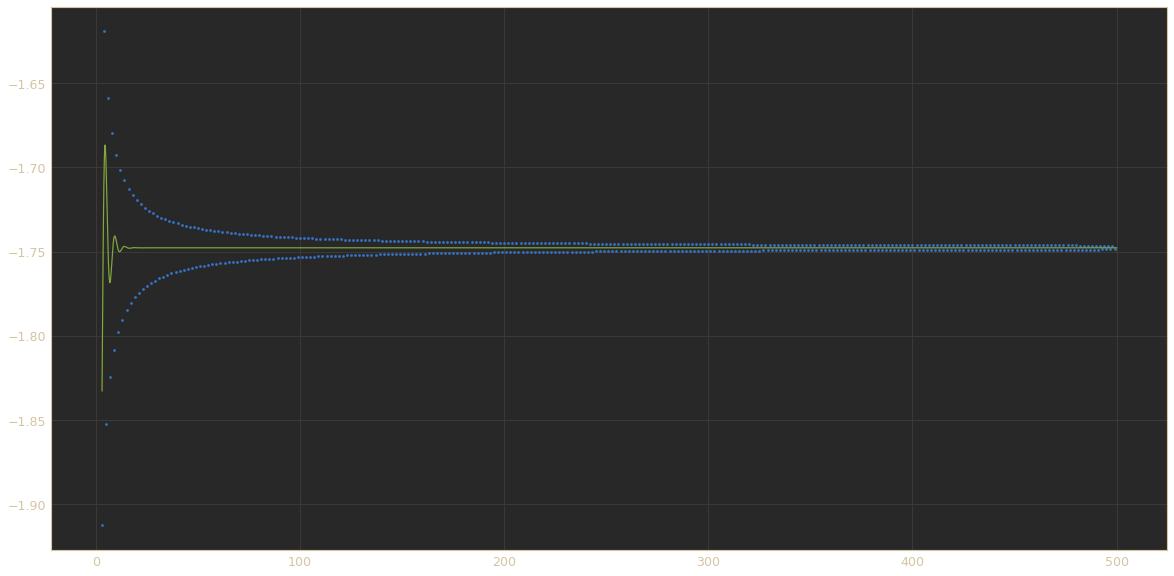

In [11]:
# Graph the Madelung Constant for various values of L

def trial(x,a,b,c):
    return 0.5*np.exp(-a*x)*np.cos(b*x)-c

# Try to find a fit
guess = [0.1,2,1.74]
popt,pcov = opt.curve_fit(trial,L,results,p0=guess,maxfev=10000)
a,b,c = popt

pontosx = np.linspace(3,500, num=5000)

ajuste = trial(pontosx,a,b,c)

print(a,' ',b,' ',c)

# Draw the graph
fig1 = plt.figure(figsize=(20,10))
plt.plot(L,results,'.')
plt.plot(pontosx,ajuste,'-')
plt.plot()